# 傅里叶变换

## 可视化小实验

### 导入依赖和初始化配置

In [10]:
%matplotlib widget
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons

# 配置参数
fs = 1000            # 采样率（Hz）
T = 1.0              # 信号持续时间（秒）
t = np.linspace(0, T, int(fs * T), endpoint=False)  # 时间轴

# 初始信号参数
f0 = 5.0             # 初始频率（Hz）
A = 1.0              # 初始幅值
phi = 0.0            # 初始相位

### 生成不同类型的信号

In [11]:
def generate_signal(signal_type, freq=f0, amp=A, phase=phi):
    if signal_type == 'sine':
        return amp * np.sin(2 * np.pi * freq * t + phase)
    elif signal_type == 'square':
        return amp * np.sign(np.sin(2 * np.pi * freq * t))
    elif signal_type == 'triangle':
        t_mod = (freq * t) % 1
        wave = np.where(t_mod < 0.5, 4 * t_mod - 1, -4 * t_mod + 3)
        return amp * wave
    elif signal_type == 'sawtooth':
        t_mod = (freq * t) % 1
        return amp * (2 * t_mod - 1)
    elif signal_type == 'noise':
        return np.random.normal(0, amp, len(t))
    else:
        return np.zeros_like(t)

### 绘图函数实现

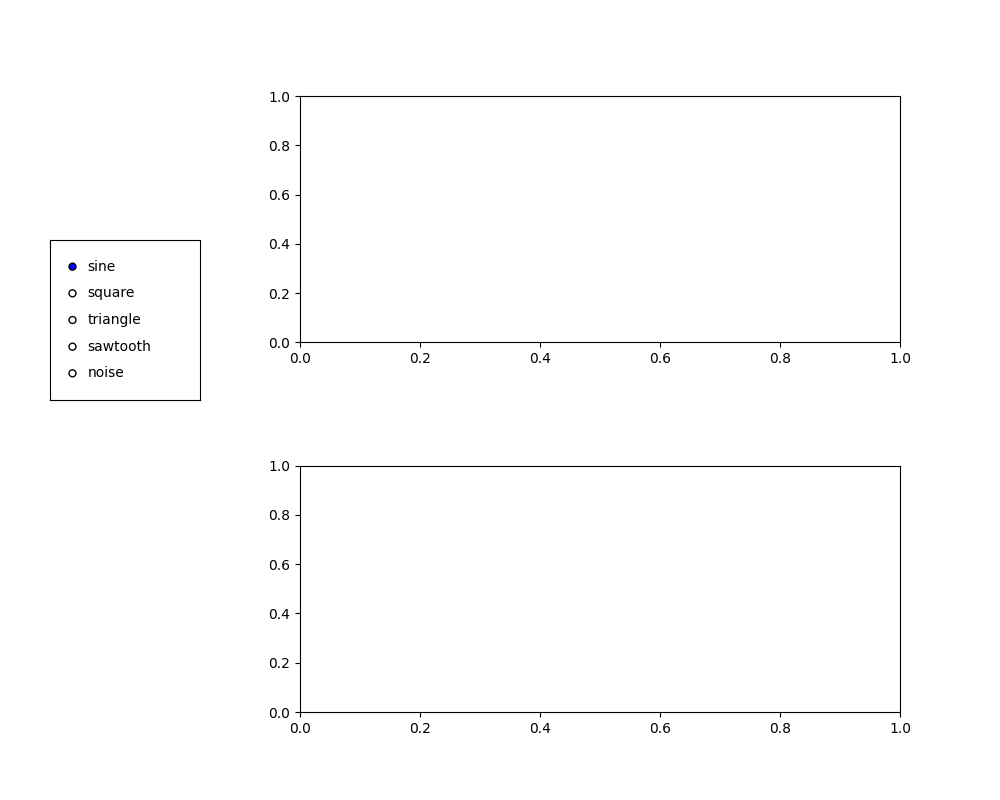

In [12]:
# 设置绘图区域
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(left=0.3, right=0.9, hspace=0.5)

# 添加信号选择控件
rax = plt.axes([0.05, 0.5, 0.15, 0.2])
radio = RadioButtons(rax, ('sine', 'square', 'triangle', 'sawtooth', 'noise'))

In [13]:
# 更新绘图函数
def update_plot(label):
    signal = generate_signal(label)
    ax1.clear()
    ax1.plot(t, signal)
    ax1.set_title(f'Time Domain - {label.capitalize()} Wave')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Amplitude')
    
    n_fft = len(signal)
    yf = np.fft.fft(signal)
    half_n = n_fft // 2 + 1
    yf_mag = np.abs(yf[:half_n]) * 2 / n_fft
    yf_mag[0] /= 2  # 直流分量
    if n_fft % 2 == 0:
        yf_mag[-1] /= 2  # 奈奎斯特频率

    # 频率轴
    xf = np.fft.fftfreq(n_fft, 1/fs)
    xf_pos = xf[:half_n]

    ax2.clear()
    ax2.plot(xf_pos, yf_mag)
    ax2.set_title('Frequency Domain')
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Magnitude')
    ax2.set_xlim(0, fs / 2)
    plt.draw()


### 绘制

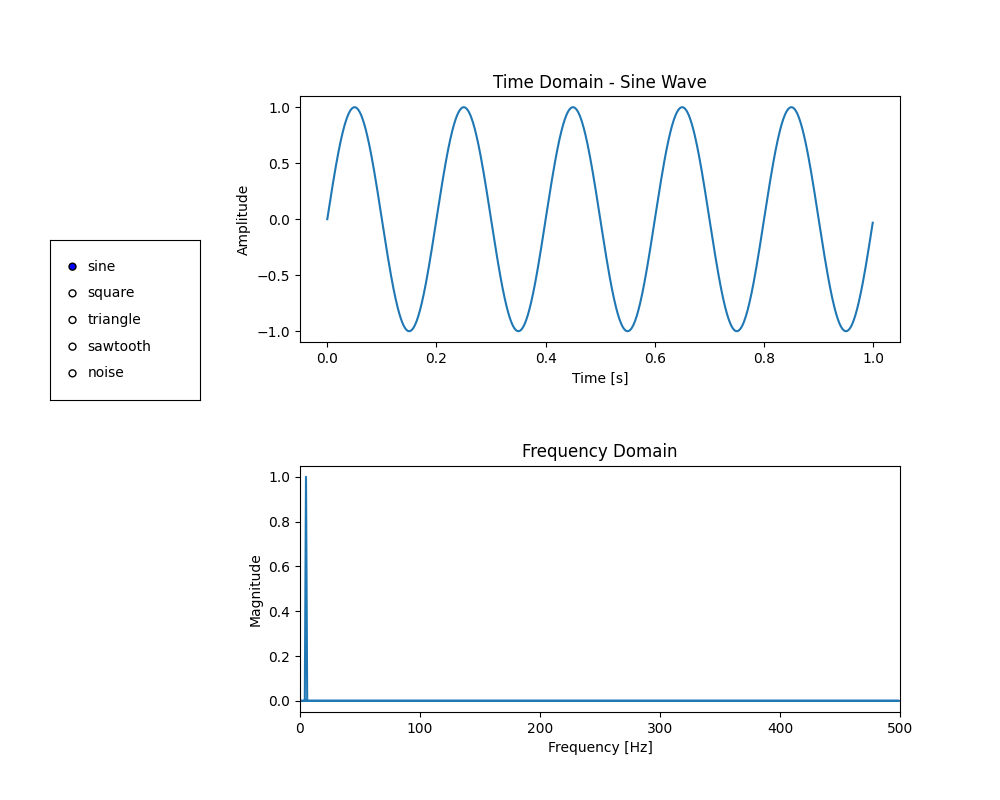

In [14]:
# 初始绘图
update_plot('sine')

# 绑定按钮事件
radio.on_clicked(update_plot)

# 显示图形界面
plt.show()